In [1]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score  
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from random import randint
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/%20Stroke%20Prediction%20Dataset/healthcare-dataset-stroke-data.csv")

In [3]:
print("Dataframe Details")
print("Total Rows: {}\nTotal Columns: {}".format(Data.shape[0],Data.shape[1]))
Data.head()

Dataframe Details
Total Rows: 5110
Total Columns: 12


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
Data.isnull().sum().sort_values(ascending=False)[:5]

bmi             201
id                0
gender            0
age               0
hypertension      0
dtype: int64

In [5]:
bmi = round(Data['bmi'].mean(),1) 
Data['bmi'].fillna(bmi, inplace=True)
Data['age'].fillna(0,inplace=True)
bins = [0,18,36,54,72,90]
labels = ['0-18','18-36','36-54','54-72','72-90']
Data['age'] = pd.cut(Data['age'], bins=bins, labels=labels)
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,54-72,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,54-72,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,72-90,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,36-54,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,72-90,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
StrokeAnalysis = Data.copy()
StrokeAnalysis['hypertension'] = StrokeAnalysis['hypertension'].apply(lambda x : 'Hypertension' if x == 1 else 'No Hypertension') 
StrokeAnalysis['heart_disease'] = StrokeAnalysis['heart_disease'].apply(lambda x : 'Heart Disease' if x == 1 else 'No Heart Disease') 
StrokeAnalysis['stroke'] = StrokeAnalysis['stroke'].apply(lambda x : 'Suffered Stroke' if x == 1 else 'Never Suffered Stroke') 
StrokeAnalysis['ever_married'] = StrokeAnalysis['ever_married'].apply(lambda x : 'Married' if x == 'Yes' else 'Unmarried') 

StrokeAnalysis.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,54-72,No Hypertension,Heart Disease,Married,Private,Urban,228.69,36.6,formerly smoked,Suffered Stroke
1,51676,Female,54-72,No Hypertension,No Heart Disease,Married,Self-employed,Rural,202.21,28.9,never smoked,Suffered Stroke
2,31112,Male,72-90,No Hypertension,Heart Disease,Married,Private,Rural,105.92,32.5,never smoked,Suffered Stroke
3,60182,Female,36-54,No Hypertension,No Heart Disease,Married,Private,Urban,171.23,34.4,smokes,Suffered Stroke
4,1665,Female,72-90,Hypertension,No Heart Disease,Married,Self-employed,Rural,174.12,24.0,never smoked,Suffered Stroke


Text(0, 0.5, 'Count Of Patients')

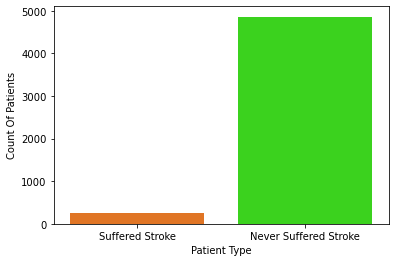

In [7]:
value = randint(0, len(colors)-1)

sns.countplot(x = 'stroke',palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Patient Type")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count Of Patients')

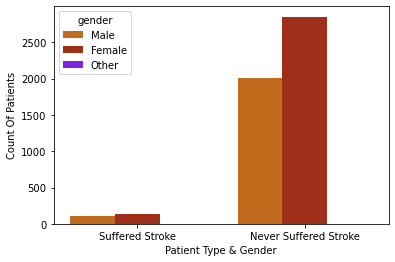

In [8]:
value = randint(0, len(colors)-1)

sns.countplot(x = 'stroke',hue = 'gender',palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Patient Type & Gender")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count by Gender')

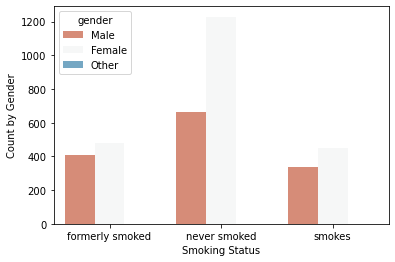

In [9]:
value = randint(0, len(colors)-1)

sns.countplot(x = StrokeAnalysis[StrokeAnalysis['smoking_status'] != 'Unknown']['smoking_status'], hue = 'gender',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Smoking Status")
plt.ylabel("Count by Gender")

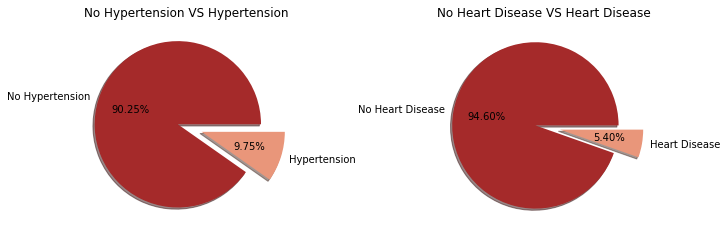

In [10]:
plt.figure(figsize=(10,5))
placement = 1

for i in ['hypertension','heart_disease']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(1,2,placement)    
    explode = (0.1, 0.2)
    plt.pie(value, labels = label,autopct='%1.2f%%',colors=['brown','darksalmon'],shadow=True,explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4)    

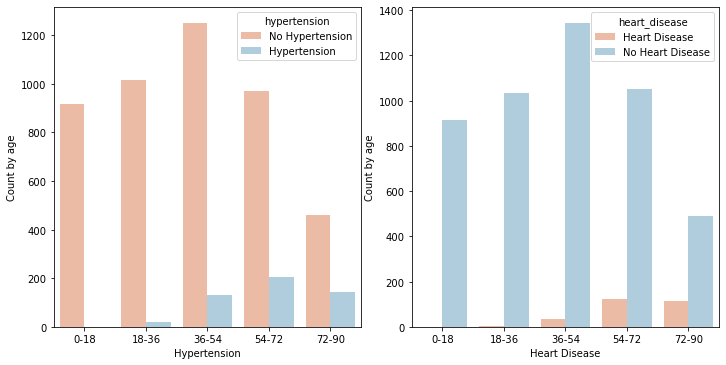

In [11]:
value = randint(0, len(colors)-1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  
sns.countplot(x = 'age', hue = 'hypertension',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Hypertension")
plt.ylabel("Count by age")

plt.subplot(1,2,2)  
sns.countplot(x = 'age', hue = 'heart_disease',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Heart Disease")
plt.ylabel("Count by age")

plt.tight_layout(pad=0.4)    

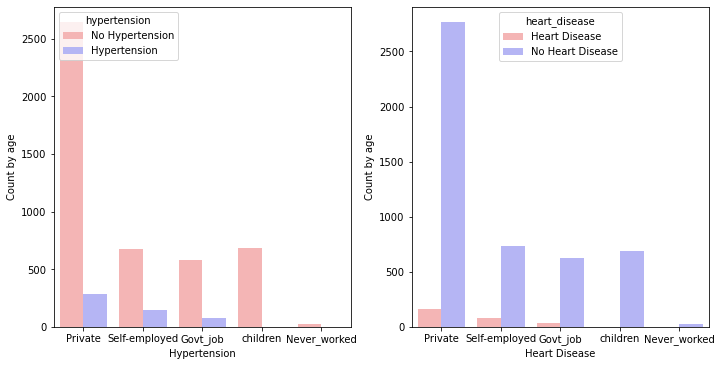

In [12]:
value = randint(0, len(colors)-1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  
sns.countplot(x = 'work_type', hue = 'hypertension',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Hypertension")
plt.ylabel("Count by age")

plt.subplot(1,2,2)  
sns.countplot(x = 'work_type', hue = 'heart_disease',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Heart Disease")
plt.ylabel("Count by age")

plt.tight_layout(pad=0.4)    

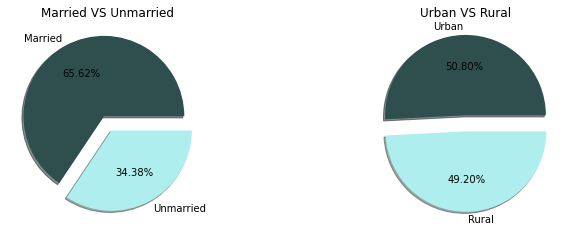

In [13]:
plt.figure(figsize=(10,6))
placement = 1

for i in ['ever_married','Residence_type']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(2,2,placement)    
    explode = (0.1, 0.1)
    plt.pie(value, labels = label,autopct='%1.2f%%',colors=['darkslategrey','paleturquoise'],shadow=True,explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4)    

Text(0, 0.5, 'Count by Marital Status')

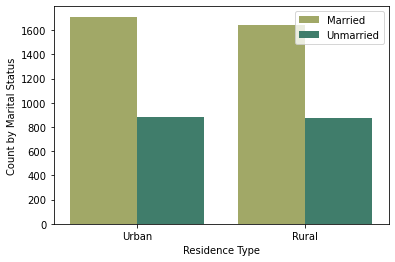

In [14]:
value = randint(0, len(colors)-1)

sns.countplot(x = 'Residence_type', hue = 'ever_married', palette = colors[value],data = StrokeAnalysis)
plt.legend(StrokeAnalysis['ever_married'].unique(), loc ="upper right") 
plt.xlabel("Residence Type")
plt.ylabel("Count by Marital Status")

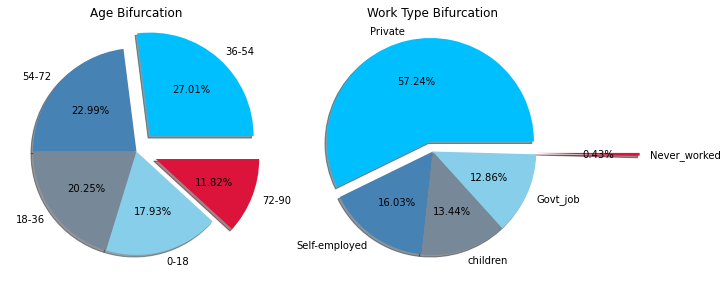

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) 
label = StrokeAnalysis['age'].value_counts().index
value = StrokeAnalysis['age'].value_counts().values
explode = (0.2,0,0,0,0.2)
plt.pie(value, labels = label,autopct='%1.2f%%',colors=['deepskyblue','steelblue','lightslategrey','skyblue','crimson'],shadow=True,explode=explode)
plt.title("Age Bifurcation")

plt.subplot(1,2,2)  
label = StrokeAnalysis['work_type'].value_counts().index
value = StrokeAnalysis['work_type'].value_counts().values
explode = (0.1,0,0,0,1)
plt.pie(value, labels = label,autopct='%1.2f%%',colors=['deepskyblue','steelblue','lightslategrey','skyblue','crimson'],shadow=True,explode=explode)
plt.title("Work Type Bifurcation")

plt.tight_layout(pad=0.4)    

Text(0, 0.5, 'Count by Body Mass Index')

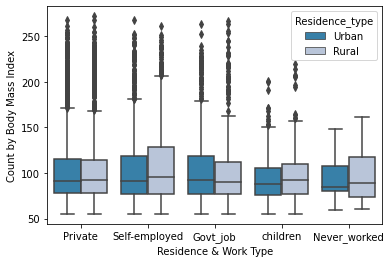

In [16]:
value = randint(0, len(colors)-1)

sns.boxplot(x = 'work_type', y = 'avg_glucose_level', hue = 'Residence_type',palette = colors[value],data = StrokeAnalysis)
plt.xlabel("Residence & Work Type")
plt.ylabel("Count by Body Mass Index")

Text(3.674999999999997, 0.5, 'Average Glucose Level')

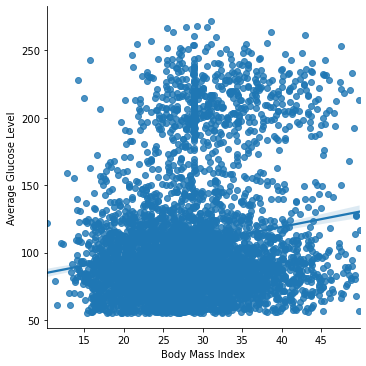

In [17]:
value = randint(0, len(colors)-1)

StrokeAnalysis = StrokeAnalysis[StrokeAnalysis['bmi']<50]
sns.lmplot(x = 'bmi', y = 'avg_glucose_level',palette = colors[value],data = StrokeAnalysis)
plt.xlabel("Body Mass Index")
plt.ylabel("Average Glucose Level")

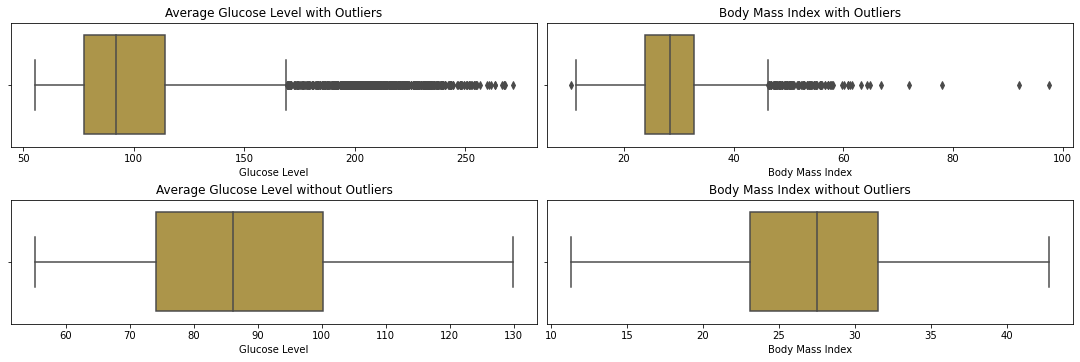

In [18]:
value = randint(0, len(colors)-1)
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
plt.title("Average Glucose Level with Outliers")
sns.boxplot(x = Data['avg_glucose_level'],palette = colors[value])
plt.xlabel("Glucose Level")

plt.subplot(2,2,2)
plt.title("Body Mass Index with Outliers")
sns.boxplot(x = Data['bmi'],palette = colors[value])
plt.xlabel("Body Mass Index")

plt.subplot(2,2,3)
plt.title("Average Glucose Level without Outliers")
Data = Data[Data['avg_glucose_level'] < 130] 
sns.boxplot(x = Data['avg_glucose_level'],palette = colors[value])
plt.xlabel("Glucose Level")

plt.subplot(2,2,4)
plt.title("Body Mass Index without Outliers")
Data = Data[(Data['bmi'] > 10.3) & (Data['bmi'] < 43)] 
sns.boxplot(x = Data['bmi'],palette = colors[value])
plt.xlabel("Body Mass Index")

plt.tight_layout(pad=0.6)

In [19]:
encoder = LabelEncoder()

column = ['gender', 'age', 'hypertension', 'ever_married','work_type', 'Residence_type', 'smoking_status']

for i in column:
    Data[i] = encoder.fit_transform(Data[i])
    
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,4,0,1,1,2,0,105.92,32.5,2,1
6,53882,1,4,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,3,0,0,0,2,1,94.39,22.8,2,1
8,27419,0,3,0,0,1,2,0,76.15,28.9,0,1
9,60491,0,4,0,0,1,2,1,58.57,24.2,0,1


In [20]:
majority = Data[Data['stroke'] == 0]
minority = Data[Data['stroke'] == 1]

upsampled = resample(minority, replace=True, n_samples=len(majority))

In [21]:
StrokeData = pd.concat([majority,upsampled])
StrokeData = StrokeData.sample(frac=1).reset_index(drop=True)
StrokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30405,0,1,0,0,0,2,0,75.25,39.7,1,0
1,65842,0,3,1,0,1,3,0,61.94,25.3,3,1
2,23410,0,3,0,0,1,2,0,97.92,26.9,3,1
3,34060,1,3,1,0,1,3,0,87.80,28.9,0,1
4,6295,0,3,0,0,1,0,1,104.36,19.2,3,0


In [22]:
X = StrokeData.drop(['id','stroke'],axis=1)
y = StrokeData['stroke']

DataModels = pd.DataFrame()
def TrainandTestwithMinMaxScalar(X,y,algorithm,modelname):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    norm = MinMaxScaler().fit(X_train)

    X_train = norm.transform(X_train)

    X_test = norm.transform(X_test)

    model = algorithm
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)

    score = round((accuracy_score(y_test, prediction)*100),2)
    print("\nModel Score:",score,"%")
    print("Precision:", precision_score(y_test, prediction))
    print("Recall:", recall_score(y_test, prediction))
    print("F1 score:", f1_score(y_test, prediction))
    print("ROC-AUC score:", roc_auc_score(y_test, prediction))
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
    print()
    
    model = {}
    
    model['Algorithm'] = modelname
    model['Model Score'] = str(score) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model
algorithms = {"Random Forest":RandomForestClassifier(),"Decision Tree":DecisionTreeClassifier(),
              "Logistic Regression":LogisticRegression(),"K-Nearest Neighbour":KNeighborsClassifier(n_neighbors=3),
              "Support Vector Classifier":SVC()}

for i,j in algorithms.items():
    print("Algorithm Performance: {}".format(i))
    
    model = TrainandTestwithMinMaxScalar(X,y,j,i)
    DataModels = DataModels.append(model,ignore_index=True)
    
    print()    

Algorithm Performance: Random Forest

Model Score: 99.35 %
Precision: 0.9880810488676997
Recall: 1.0
F1 score: 0.9940047961630696
ROC-AUC score: 0.9930651872399445
Confusion Matrix:
 [[711  10]
 [  0 829]]


Algorithm Performance: Decision Tree

Model Score: 98.13 %
Precision: 0.9642857142857143
Recall: 1.0
F1 score: 0.9818181818181818
ROC-AUC score: 0.9810951760104302
Confusion Matrix:
 [[738  29]
 [  0 783]]


Algorithm Performance: Logistic Regression

Model Score: 74.39 %
Precision: 0.7196796338672768
Recall: 0.8053777208706786
F1 score: 0.7601208459214501
ROC-AUC score: 0.7433910710985383
Confusion Matrix:
 [[524 245]
 [152 629]]


Algorithm Performance: K-Nearest Neighbour

Model Score: 95.74 %
Precision: 0.9198055893074119
Recall: 1.0
F1 score: 0.9582278481012657
ROC-AUC score: 0.9583858764186632
Confusion Matrix:
 [[727  66]
 [  0 757]]


Algorithm Performance: Support Vector Classifier

Model Score: 80.39 %
Precision: 0.7717647058823529
Recall: 0.856396866840731
F1 score: 0.81

In [23]:
DataModels.sort_values(by='F1 score',ascending=False)

,Algorithm,F1 score,Model Score,Precision,ROC-AUC score,Recall
0,Random Forest,0.99,99.35%,0.99,0.99,1.00
1,Decision Tree,0.98,98.13%,0.96,0.98,1.00
3,K-Nearest Neighbour,0.96,95.74%,0.92,0.96,1.00
4,Support Vector Classifier,0.81,80.39%,0.77,0.80,0.86
2,Logistic Regression,0.76,74.39%,0.72,0.74,0.81
